In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [2]:
wine = pd.read_csv('D:\\2021 - Fall Semester\\1 - class\\577data\\wine.csv')

wine

,type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


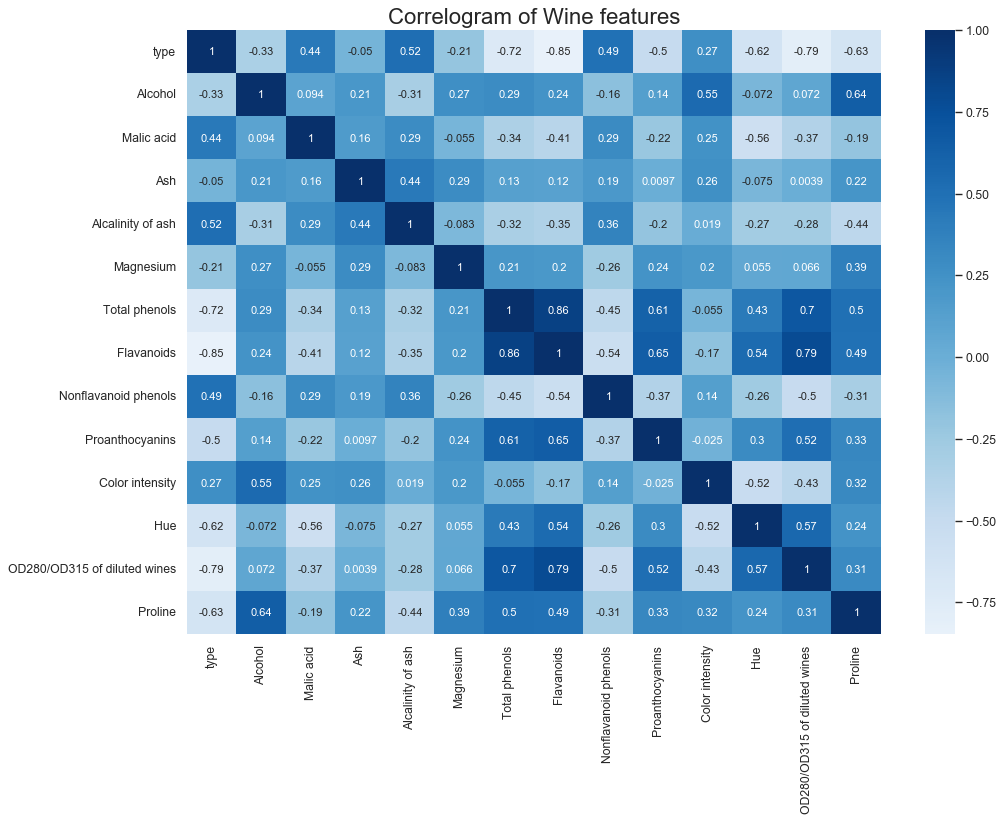

In [12]:
# Find the correlation feature of wine features

wine_col = wine.columns

plt.figure(figsize=(14,10), dpi= 80)
sns.heatmap(wine.corr(method='pearson'), xticklabels=wine_col, yticklabels=wine_col, cmap = 'Blues', center=0, annot=True)
plt.title('Correlogram of Wine features', fontsize=20)
plt.show()



### From the correlogram, we find the feature 'Ash' has a pearson correlation coefficient with 'type' around 0. Also the coefficient between 'type' and 'Magnesium' and 'Color intensity' is significantly lower than other strongly correlated features. So basically, we would construct a model including all features except the above three features. Also we check the same data with kendall and spearman methods, and the latter both shows that the three features still exhibit a relatively weak correlation.

In [14]:
X = wine.drop(columns=['type', 'Ash', 'Magnesium', 'Color intensity'])
y = wine['type']

X

,Alcohol,Malic acid,Alcalinity of ash,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,15.6,2.80,3.06,0.28,2.29,1.04,3.92,1065
1,13.20,1.78,11.2,2.65,2.76,0.26,1.28,1.05,3.40,1050
2,13.16,2.36,18.6,2.80,3.24,0.30,2.81,1.03,3.17,1185
3,14.37,1.95,16.8,3.85,3.49,0.24,2.18,0.86,3.45,1480
4,13.24,2.59,21.0,2.80,2.69,0.39,1.82,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,20.5,1.68,0.61,0.52,1.06,0.64,1.74,740
174,13.40,3.91,23.0,1.80,0.75,0.43,1.41,0.70,1.56,750
175,13.27,4.28,20.0,1.59,0.69,0.43,1.35,0.59,1.56,835
176,13.17,2.59,20.0,1.65,0.68,0.53,1.46,0.60,1.62,840


In [26]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error


In [28]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras import activations
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [45]:
x_train_np = x_train.to_numpy()
x_test_np = x_test.to_numpy()
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

x_train_np, x_valid_np, y_train_np, y_valid_np = train_test_split(x_train_np, y_train_np)

In [47]:
input_ = keras.layers.Input(shape=(x_train_np.shape[1],))
h1 = keras.layers.Dense(50, activation = activations.relu)(input_)
h2 = keras.layers.Dense(40, activation = activations.relu)(h1)
h3 = keras.layers.Dense(30, activation = activations.relu)(h2)
h4 = keras.layers.Dense(20, activation = activations.relu)(h3)
h5 = keras.layers.Dense(10, activation = activations.relu)(h4)
output = keras.layers.Dense(1, activation = activations.relu)(h5)

model = keras.Model(inputs=[input_], outputs = [output])
model.compile(loss = 'mean_squared_error', optimizer = 'Adam')
 
fit1 = model.fit(x_train_np, y_train_np, epochs = 10, validation_data=(x_valid_np, y_valid_np))

Train on 93 samples, validate on 31 samples
Epoch 1/10
93/93 [==============================] - 1s 10ms/sample - loss: 3.2656 - val_loss: 4.8387
Epoch 2/10
93/93 [==============================] - 0s 64us/sample - loss: 4.3118 - val_loss: 4.8387
Epoch 3/10
93/93 [==============================] - 0s 75us/sample - loss: 4.3118 - val_loss: 4.8387
Epoch 4/10
93/93 [==============================] - 0s 86us/sample - loss: 4.3118 - val_loss: 4.8387
Epoch 5/10
93/93 [==============================] - 0s 75us/sample - loss: 4.3118 - val_loss: 4.8387
Epoch 6/10
93/93 [==============================] - 0s 75us/sample - loss: 4.3118 - val_loss: 4.8387
Epoch 7/10
93/93 [==============================] - 0s 107us/sample - loss: 4.3118 - val_loss: 4.8387
Epoch 8/10
93/93 [==============================] - 0s 107us/sample - loss: 4.3118 - val_loss: 4.8387
Epoch 9/10
93/93 [==============================] - 0s 129us/sample - loss: 4.3118 - val_loss: 4.8387
Epoch 10/10
93/93 [=========================

In [48]:
MSE_on_test = model.evaluate(x_test_np, np.array(y_test_np))
print(MSE_on_test)

54/54 [==============================] - 0s 55us/sample - loss: 4.1481
4.148148148148148


In [ ]:
X_new = X_test_s
y_hat = model.predict(X_new)

print("predict", y_hat)
print("actual", np.array(y_test))

plot_model(model, to_file = 'model_plot.png', show_shapes = True, show_layer_names = True)